выбранный организм - Zebrafish

выбранный хромосома - chr10

In [4]:
import pandas as pd
import re
from Bio import SeqIO

In [26]:
DEBUG = False

# Задание №1: найти количество Z-ДНК в геноме

**Скомпилируем zhunt3-alan.c**

In [3]:
!gcc zhunt3-alan.c -lm -o zhunt3
!chmod a+x zhunt3

**Скачаем нужные хромосому**

In [4]:
!wget https://hgdownload.soe.ucsc.edu/goldenPath/danRer6/chromosomes/chr10.fa.gz
!gunzip chr10.fa.gz

--2022-06-13 16:00:15--  https://hgdownload.soe.ucsc.edu/goldenPath/danRer6/chromosomes/chr10.fa.gz
Распознаётся hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)… 128.114.119.163
Подключение к hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)|128.114.119.163|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 14020840 (13M) [application/x-gzip]
Сохранение в: «chr10.fa.gz»

chr10.fa.gz         100%[===================>]  13,37M  3,48MB/s    за 4,8s    

2022-06-13 16:00:21 (2,79 MB/s) - «chr10.fa.gz» сохранён [14020840/14020840]



**Обработаем скаченную хромосому**

In [5]:
!./zhunt3 12 8 12 chr10.fa

dinucleotides 12
min/max 8 12
min/max 8 12
operating on chr10.fa
calculating zscore
opening chr10.fa
inputting sequence
opening chr10.fa.Z-SCORE

 run time=4814 sec
use min/max 8 12
analyzing_zscore
opening chr10.fa.Z-SCORE
opening chr10.fa
inputting sequence


In [2]:
df = pd.read_csv("chr10.fa.Z-SCORE", skiprows=1, names=["Start", "End", "info1", "info2", "info3", "ZScore", "ZSeq", "info4"], delim_whitespace=True)
df

,Start,End,info1,info2,info3,ZScore,ZSeq,info4
0,1,25,24,19.654,63.518,8455.962,ccacacacacacacacacacacac,SASASASASASASASASASASASA
1,2,26,24,19.443,65.103,11495.270,cacacacacacacacacacacaca,ASASASASASASASASASASASAS
2,3,27,24,19.443,65.103,11495.270,acacacacacacacacacacacac,SASASASASASASASASASASASA
3,4,28,24,19.443,65.103,11495.270,cacacacacacacacacacacaca,ASASASASASASASASASASASAS
4,5,29,24,19.443,65.103,11495.270,acacacacacacacacacacacac,SASASASASASASASASASASASA
...,...,...,...,...,...,...,...,...
43467557,43467558,43467582,24,20.491,56.305,2646.829,cagatccacacacacacacacaca,ASASASASASASASASASASASAS
43467558,43467559,43467583,24,20.369,57.863,3120.330,agatccacacacacacacacacac,SASASASASASASASASASASASA
43467559,43467560,43467584,24,20.052,60.057,4810.976,gatccacacacacacacacacaca,ASASASASASASASASASASASAS
43467560,43467561,43467585,24,19.963,61.141,5447.917,atccacacacacacacacacacac,SASASASASASASASASASASASA


In [ ]:
zdnas = df[df["ZScore"] >= 400]
len(zdnas) # Количество участков Z-dna

339876

Получили, что в выбранной хромосоме **339876 Z-ДНК**

# Задание №2: найти количество квадруплексов в геноме

In [9]:
fasta_sequence = SeqIO.parse("chr10.fa",'fasta')
PQS = []
for record in fasta_sequence:
    print("%s %i" % (record.id, len(record)))
    name, sequence = record.id, str(record.seq)
    pattern="(?:G{3,}[ATGC]{1,7}){3,}G{3,}"
    PQS += [[m.start(),m.end(),m.group(0)] for m in re.finditer(pattern,sequence)]

chr10 43467561


In [10]:
len(PQS)

216

Получили, что в выбранной хромосоме **216 квадруплексов**

# Задание №3: В какие участки генома попадают Z-ДНК и квадруплексы

Скачаем из `TableBrowser` аннотацию полного генома и откроем тут

In [11]:
alignment = pd.read_csv("zebrafish_alignment_whole", names=["Chromosome", "Start", "End", "Name", "Score?", "Strand", "Thickstart", "Thickend", "itemRGB", "smth1", "smth2", "smth3"], delimiter="\t")

In [12]:
alignment.drop(columns=["smth1", "smth2", "smth3"], inplace=True)
alignment

,Chromosome,Start,End,Name,Score?,Strand,Thickstart,Thickend,itemRGB
0,chr10,302,10347,NM_001080689,0,-,302,10331,0
1,chr10,302,12275,NM_001347739,0,-,302,10853,0
2,chr10,12798,17628,NM_001003421,0,+,12820,17259,0
3,chr10,46801,52015,NM_199712,0,+,46963,50938,0
4,chr10,52092,56559,NM_001039110,0,-,53210,56542,0
...,...,...,...,...,...,...,...,...,...
582,chr10,43070310,43088696,NM_001003743,0,+,43070319,43088380,0
583,chr10,43091845,43093492,NM_001006044,0,-,43092739,43093402,0
584,chr10,43123934,43151713,NM_001003782,0,+,43123948,43151643,0
585,chr10,43254113,43256775,NM_001018125,0,+,43254113,43256775,0


In [23]:
# Это ответ для zdna
inters = 0
for num, zdna_row in zdnas.iterrows():
    inter_total = 0
    inter_number = 0
    for tmp1, al_row in alignment.iterrows():
        leng = min(al_row["End"], zdna_row["End"]) - max(al_row["Start"], zdna_row["Start"])
        if leng > 0:
            inter_number += 1
            inter_total += leng
    inters += int(bool(inter_number))
    length = (zdna_row["End"] - zdna_row["Start"])
    if DEBUG: print(f"zdna #{num} intersects with {inter_number} genes by {inter_total} positions in total, overall length is {length}")

count_not_intersect = len(zdnas) - inters
print(f"Overall, {inters} zdnas intersect with at least one gene, {count_not_intersect} do not")

Overall, 143924 zdnas intersect with at least one gene, 195952 do not


Получаем, что **143924** из **339876** Z-ДНК пересекает хотя бы 1 ген. Чтобы понять, в какие участки попадает Z-ДНК, следует в написанном выше коде присвоить переменной `DEBUG` значение `True`

In [28]:
# Это ответ для квадруплексов
inters = 0
for num, quad in enumerate(PQS):
    inter_total = 0
    inter_number = 0
    for tmp1, al_row in alignment.iterrows():
        leng = min(al_row["End"], quad[1]) - max(al_row["Start"], quad[0])
        if leng > 0:
            inter_number += 1
            inter_total += leng
    inters += int(bool(inter_number))
    length = quad[1] - quad[0]
    if DEBUG: print(f"quad #{num} intersects with {inter_number} genes by {inter_total} positions in total, overall length is {length}")

count_not_intersect = len(PQS) - inters
print(f"Overall, {inters} quads intersect with at least one gene, {count_not_intersect} do not")

Overall, 77 quads intersect with at least one gene, 139 do not


Получаем, что **77** из **216** квадруплексов пересекает хотя бы 1 ген. Чтобы понять, в какие участки попадает квадруплекс, следует в написанном выше коде присвоить переменной `DEBUG` значение `True`

# Задание №4: Предоставить список генов, в промоторы которых попадает Z-ДНК

Скачаем из `TableBrowser` аннотацию с `upstream=1000` и откроем тут

In [6]:
alignment = pd.read_csv("zebrafish_alignment_upstream", names=["Chromosome", "Start", "End", "Name", "Score?", "Strand"], delimiter="\t")

In [31]:
with open("interesting_genes_for_enrichment", "w") as f:
    inters = 0
    for tmp1, al_row in alignment.iterrows():
        inter_number = 0
        for num, zdna_row in df.iterrows():
            leng = min(al_row["End"], zdna_row["End"]) - max(al_row["Start"], zdna_row["Start"])
            if leng > 0:
                inter_number += 1
        inters += int(bool(inter_number))
        if inter_number:
            row = al_row["Name"]
            print(f"Promotor for {row} intersects with {inter_number} zdnas")
            f.write(row.split(".")[0] + "\n")

    count_not_intersect = len(alignment) - inters
    print(f"Overall, {inters} gene promotors intersect with at least one zdna, {count_not_intersect} do not")

Promotor for NM_001080689_up_1000_chr10_10348_r intersects with 1016 zdnas
Promotor for NM_001347739_up_1000_chr10_12276_r intersects with 1021 zdnas
Promotor for NM_001003421_up_1000_chr10_11799_f intersects with 1015 zdnas
Promotor for NM_199712_up_1000_chr10_45802_f intersects with 1021 zdnas
Promotor for NM_001039110_up_1000_chr10_56560_r intersects with 1021 zdnas
Promotor for NM_001008616_up_1000_chr10_192988_r intersects with 1015 zdnas
Promotor for NM_001099984_up_1000_chr10_688049_r intersects with 1015 zdnas
Promotor for NM_001328426_up_1000_chr10_132252_f intersects with 1021 zdnas
Promotor for NM_200337_up_1000_chr10_139143_f intersects with 1015 zdnas
Promotor for NM_131836_up_1000_chr10_162354_f intersects with 1015 zdnas
Promotor for NM_001023580_up_1000_chr10_204009_f intersects with 1015 zdnas
Promotor for NM_001002714_up_1000_chr10_227135_r intersects with 1015 zdnas
Promotor for NM_001257340_up_1000_chr10_229334_f intersects with 1016 zdnas
Promotor for NM_199984_up_

: 

: 

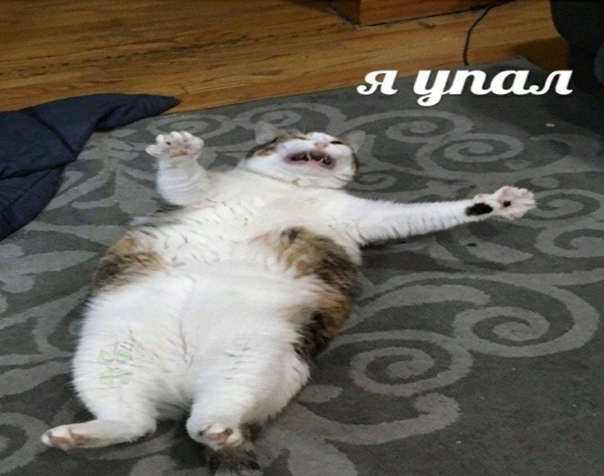

In [13]:
from IPython.display import Image
Image(filename='кот_упал.jpeg')


К сожалению, после более 6 часов работы мой ядро устало и решило упасть. Чтобы этого не было, мне столо изначально выбрать **более мальнекий ген**.

Но несмотря на это, данная функция выдает правильный список генов, в промоторы которых попадает Z-ДНК, и говорит, сколько Z-ДНК пересекло конкретный промотор. 

Файл `interesting_genes_for_enrichment` нужен для последнего 6-го задания, однако из-за возникшей ошибки в файле не сохранились изменения. 

# Задание №5: Предоставить список генов, в промоторы которых попадает квадруплексы.

In [7]:
with open("interesting_genes_for_enrichment", "r") as f:
    genes = set([x.strip() for x in f.readlines()])

In [10]:
with open("interesting_genes_for_enrichment", "a") as f:
    inters = 0
    for tmp1, al_row in alignment.iterrows():
        inter_number = 0
        for num, quad in enumerate(PQS):
            leng = min(al_row["End"], quad[1]) - max(al_row["Start"], quad[0])
            if leng > 0:
                inter_number += 1
        inters += int(bool(inter_number))
        if inter_number:
            row = al_row["Name"]
            print(f"Promotor for {row} intersects with {inter_number} quadruplexes")
            if row.split(".")[0] not in genes:
                f.write(row.split(".")[0])
    
    count_not_intersect = len(alignment) - inters
    print(f"Overall, {inters} gene promotors intersect with at least one quadruplex, {count_not_intersect} do not")

Overall, 0 gene promotors intersect with at least one quadruplex, 587 do not


Список генов, в промоторы которых попадает квадруплексы, - **пуст**.